<a href="https://colab.research.google.com/github/Indhuja21/Bank-loan-default-prediction/blob/main/Bank_loan_default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

In [ ]:
train_dg= pd.read_csv("/content/train_demographics.csv")
train_dg.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,10-10-1973,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,21-01-1986,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,01-04-1987,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN


In [ ]:
train_pf= pd.read_csv("/content/train_perf.csv")
train_pf.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,25-07-2017 08:22,25-07-2017 07:22,30000,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,05-07-2017 17:04,05-07-2017 16:04,15000,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,06-07-2017 14:52,06-07-2017 13:52,20000,22250.0,15,NaN,Good


In [ ]:
train_pv= pd.read_csv("/content/train_prev_loans.csv")
train_pv.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,15-08-2016 18:22,15-08-2016 17:22,10000,13000.0,30,01-09-2016 16:06,NaN,14-09-2016,01-09-2016 15:51
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,28-04-2017 18:39,28-04-2017 17:38,10000,13000.0,30,28-05-2017 14:44,NaN,30-05-2017,26-05-2017 00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,05-03-2017 10:56,05-03-2017 09:56,20000,23800.0,30,26-04-2017 22:18,NaN,04-04-2017,26-04-2017 22:03


In [ ]:
test_dg= pd.read_csv("/content/test_demographic.csv")
test_dg.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,28-08-1976,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,23-06-1978,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,04-04-1984,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN


In [ ]:
test_pv= pd.read_csv("/content/test_prev_loans.csv")
test_pv.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,15-08-2016 18:22,15-08-2016 17:22,10000,13000.0,30,01-09-2016 16:06,NaN,14-09-2016,01-09-2016 15:51
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,28-04-2017 18:39,28-04-2017 17:38,10000,13000.0,30,28-05-2017 14:44,NaN,30-05-2017,26-05-2017 00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,05-03-2017 10:56,05-03-2017 09:56,20000,23800.0,30,26-04-2017 22:18,NaN,04-04-2017,26-04-2017 22:03


In [ ]:
test_pf= pd.read_csv("/content/test_perfs.csv")
test_pf.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN



##Merging the Dataset

In [ ]:
test_pf= test_pf.drop(["creationdate","approveddate","referredby"], axis= 1)
train_pf= train_pf.drop(["referredby"], axis= 1)

In [ ]:
train_bank= pd.merge(train_pf, train_pv["firstduedate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_pv["closeddate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_pv["firstrepaiddate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["birthdate"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["longitude_gps"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["latitude_gps"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["bank_account_type"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["employment_status_clients"], left_index= True, right_index= True)
train_bank= pd.merge(train_bank, train_dg["level_of_education_clients"], left_index= True, right_index= True)
train_bank.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,closeddate,firstrepaiddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,25-07-2017 08:22,25-07-2017 07:22,30000,34500.0,30,Good,14-09-2016,01-09-2016 16:06,01-09-2016 15:51,10-10-1973,3.319219,6.528604,Savings,NaN,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,05-07-2017 17:04,05-07-2017 16:04,15000,17250.0,30,Good,30-05-2017,28-05-2017 14:44,26-05-2017 00:00,21-01-1986,3.325598,7.119403,Savings,Permanent,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,06-07-2017 14:52,06-07-2017 13:52,20000,22250.0,15,Good,04-04-2017,26-04-2017 22:18,26-04-2017 22:03,01-04-1987,5.746100,5.563174,Savings,NaN,NaN


In [ ]:
test_bank= pd.merge(test_pf, test_pv["firstduedate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["closeddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["firstrepaiddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["creationdate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_pv["approveddate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["birthdate"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["longitude_gps"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["latitude_gps"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["bank_account_type"], left_index= True, right_index= True)
test_bank= pd.merge(test_bank, test_dg["employment_status_clients"], left_index= True, right_index= True)
test_bank=pd.merge(test_bank, test_dg["level_of_education_clients"], left_index=True, right_index= True)
test_bank.head(3)

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,firstduedate,closeddate,firstrepaiddate,creationdate,approveddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,14-09-2016,01-09-2016 16:06,01-09-2016 15:51,15-08-2016 17:22,15-08-2016 18:22,28-08-1976,5.296628,7.593965,Savings,Permanent,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,30-05-2017,28-05-2017 14:44,26-05-2017 00:00,28-04-2017 17:38,28-04-2017 18:39,23-06-1978,3.294513,6.596602,Savings,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,04-04-2017,26-04-2017 22:18,26-04-2017 22:03,05-03-2017 09:56,05-03-2017 10:56,04-04-1984,8.501912,7.729364,Savings,Permanent,NaN


In [ ]:
train_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4345
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   systemloanid                4346 non-null   int64  
 2   loannumber                  4346 non-null   int64  
 3   approveddate                4346 non-null   object 
 4   creationdate                4346 non-null   object 
 5   loanamount                  4346 non-null   int64  
 6   totaldue                    4346 non-null   float64
 7   termdays                    4346 non-null   int64  
 8   good_bad_flag               4346 non-null   object 
 9   firstduedate                4346 non-null   object 
 10  closeddate                  4346 non-null   object 
 11  firstrepaiddate             4346 non-null   object 
 12  birthdate                   4346 non-null   object 
 13  longitude_gps               4346 

In [ ]:
test_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  1450 non-null   object 
 1   systemloanid                1450 non-null   int64  
 2   loannumber                  1450 non-null   int64  
 3   loanamount                  1450 non-null   int64  
 4   totaldue                    1450 non-null   float64
 5   termdays                    1450 non-null   int64  
 6   firstduedate                1450 non-null   object 
 7   closeddate                  1450 non-null   object 
 8   firstrepaiddate             1450 non-null   object 
 9   creationdate                1450 non-null   object 
 10  approveddate                1450 non-null   object 
 11  birthdate                   1450 non-null   object 
 12  longitude_gps               1450 non-null   float64
 13  latitude_gps                1450 

## Data Preprocessing


In [ ]:
train_bank.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
firstduedate                     0
closeddate                       0
firstrepaiddate                  0
birthdate                        0
longitude_gps                    0
latitude_gps                     0
bank_account_type                0
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [ ]:
test_bank.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
loanamount                       0
totaldue                         0
termdays                         0
firstduedate                     0
closeddate                       0
firstrepaiddate                  0
creationdate                     0
approveddate                     0
birthdate                        0
longitude_gps                    0
latitude_gps                     0
bank_account_type                0
employment_status_clients      211
level_of_education_clients    1249
dtype: int64

In [ ]:
train_bank["employment_status_clients"]= train_bank["employment_status_clients"].fillna("Permanent", axis= 0)
train_bank["level_of_education_clients"]= train_bank["level_of_education_clients"].fillna("Graduate", axis=0)

In [ ]:
test_bank["employment_status_clients"]= test_bank["employment_status_clients"].fillna("Permanent", axis= 0)
test_bank["level_of_education_clients"]= test_bank["level_of_education_clients"].fillna("Graduate", axis= 0)

In [ ]:
train_bank.good_bad_flag.value_counts(normalize= True) *100

Good    78.301887
Bad     21.698113
Name: good_bad_flag, dtype: float64

In [ ]:
bct_index= train_bank.groupby("bank_account_type").sum().reset_index()
bct_index

,bank_account_type,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Current,16910840245,278,895000,1062125.0,1515,270.662593,397.105742
1,Other,261213343965,4421,15400000,18338813.0,24975,4057.112313,6186.697267
2,Savings,1034285107908,17768,61070000,72953912.7,100725,15777.641015,24930.588750


In [ ]:
esc_index= train_bank.groupby("employment_status_clients").sum().reset_index()
esc_index

,employment_status_clients,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Contract,302001209,2,10000,11500.0,15,4.528632,8.468787
1,Permanent,1145715543328,19606,67560000,80695888.2,111210,17555.111139,27650.581742
2,Retired,1207915014,15,60000,73500.0,105,19.660014,23.131409
3,Self-Employed,105089305004,1817,6165000,7316687.5,9900,1621.396506,2388.589244
4,Student,42881603334,693,2525000,3018000.0,4305,611.731209,1064.831137
5,Unemployed,17212924229,334,1045000,1239275.0,1680,292.988421,378.789439


In [ ]:
lec_index= train_bank.groupby("level_of_education_clients").sum().reset_index()
lec_index

,level_of_education_clients,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
0,Graduate,1261978433605,21573,74405000,88828850.7,122280,19425.375336,30314.579678
1,Post-Graduate,20534748836,357,1175000,1411125.0,2025,320.306088,486.975400
2,Primary,3019872827,63,210000,244750.0,255,47.144160,69.009079
3,Secondary,26876236850,474,1575000,1870125.0,2655,312.590337,643.827601


In [ ]:

train_bank["birthdate"]= pd.to_datetime(train_bank["birthdate"])
train_bank["approveddate"]= pd.to_datetime(train_bank["approveddate"])
train_bank["creationdate"]= pd.to_datetime(train_bank["creationdate"])
train_bank["firstduedate"]= pd.to_datetime(train_bank["firstduedate"])
train_bank["firstrepaiddate"]= pd.to_datetime(train_bank["firstrepaiddate"])
train_bank["closeddate"]= pd.to_datetime(train_bank["firstrepaiddate"])

In [ ]:
test_bank["birthdate"]= pd.to_datetime(test_bank["birthdate"])
test_bank["approveddate"]= pd.to_datetime(test_bank["approveddate"])
test_bank["creationdate"]= pd.to_datetime(test_bank["creationdate"])
test_bank["firstduedate"]= pd.to_datetime(test_bank["firstduedate"])
test_bank["firstrepaiddate"]= pd.to_datetime(test_bank["firstrepaiddate"])
test_bank["closeddate"]= pd.to_datetime(test_bank["closeddate"])


In [ ]:
from datetime import datetime
train_bank["birth"]= [datetime.timestamp(i) for i in train_bank.birthdate]
train_bank["approved"]= [datetime.timestamp(i) for i in train_bank.approveddate]
train_bank["creation"]= [datetime.timestamp(i) for i in train_bank.creationdate]
train_bank["duedate"]= [datetime.timestamp(i) for i in train_bank.firstduedate]
train_bank["repaiddate"]= [datetime.timestamp(i) for i in train_bank.firstrepaiddate]
train_bank["closed"]= [datetime.timestamp(i) for i in train_bank.closeddate]

In [ ]:
test_bank["birth"]= [datetime.timestamp(i) for i in test_bank.birthdate]
test_bank["approved"]= [datetime.timestamp(i) for i in test_bank.approveddate]
test_bank["creation"] = [datetime.timestamp(i) for i in test_bank.creationdate]
test_bank["duedate"] = [datetime.timestamp(i) for i in test_bank.firstduedate]
test_bank["repaiddate"]= [datetime.timestamp(i) for i in test_bank.firstrepaiddate]
test_bank["closed"]= [datetime.timestamp(i) for i in test_bank.closeddate]

In [ ]:
train_bank= train_bank.drop(["birthdate","creationdate","approveddate","firstduedate","firstrepaiddate","closeddate"], axis= 1)

In [ ]:
test_bank= test_bank.drop(["birthdate","creationdate","approveddate","firstduedate","firstrepaiddate","closeddate"], axis= 1)

##Data Visualization

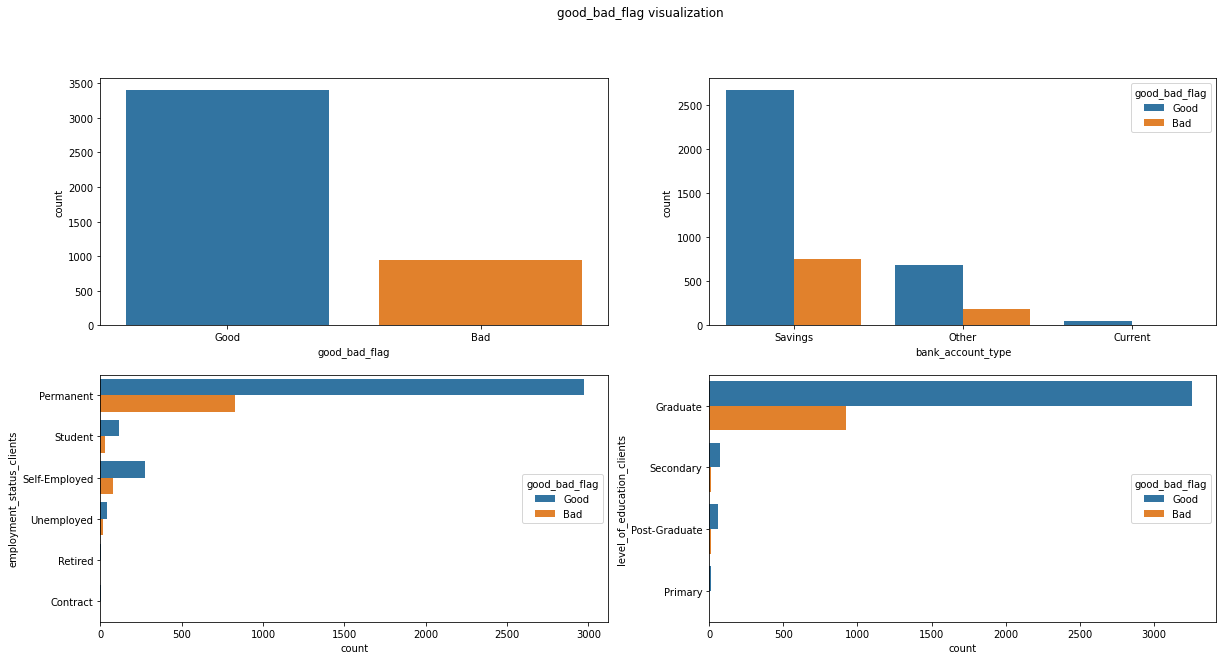

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

fig.suptitle('good_bad_flag visualization')

sns.countplot(ax=axes[0, 0], x= "good_bad_flag", data= train_bank)
sns.countplot(ax=axes[0, 1],x= "bank_account_type",hue= "good_bad_flag", data= train_bank)
sns.countplot(ax=axes[1, 0],y= "employment_status_clients", hue= "good_bad_flag", data= train_bank )
sns.countplot(ax=axes[1, 1], y= "level_of_education_clients", hue= "good_bad_flag", data= train_bank)

Good    77.961235
Bad     22.038765
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


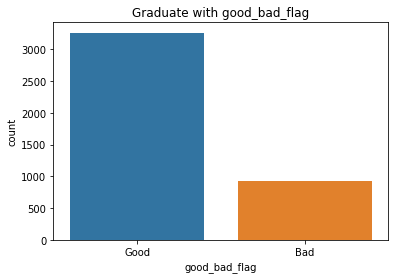

In [ ]:
lec_grad= train_bank[train_bank["level_of_education_clients"]== "Graduate"]["good_bad_flag"]
print(lec_grad.value_counts(normalize= True)* 100)
sns.countplot(lec_grad)
plt.title("Graduate with good_bad_flag")
plt.show()

Good    85.393258
Bad     14.606742
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Secondary with gbf')

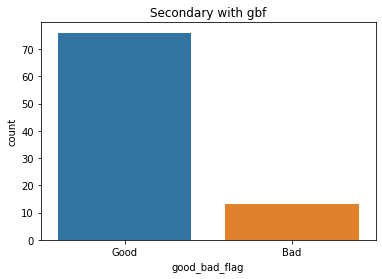

In [ ]:
lec_sec= train_bank[train_bank["level_of_education_clients"]== "Secondary"]["good_bad_flag"]
print(lec_sec.value_counts(normalize= True)*100)
sns.countplot(lec_sec)
plt.title("Secondary with gbf")

Good    86.764706
Bad     13.235294
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Post-Graduate with gbf')

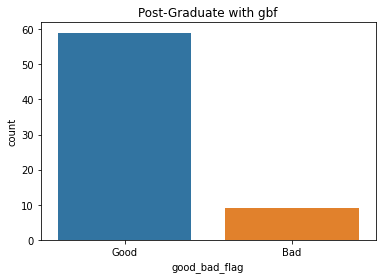

In [ ]:
lec_pgrad= train_bank[train_bank["level_of_education_clients"]== "Post-Graduate"]["good_bad_flag"]
print(lec_pgrad.value_counts(normalize= True)*100)
sns.countplot(lec_pgrad)
plt.title("Post-Graduate with gbf")

Good    100.0
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Primary with gbf')

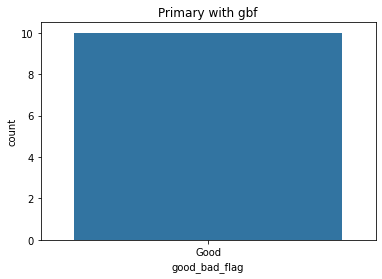

In [ ]:
lec_pri= train_bank[train_bank["level_of_education_clients"]== "Primary"]["good_bad_flag"]
print(lec_pri.value_counts(normalize= True)*100)
sns.countplot(lec_pri)
plt.title("Primary with gbf")

Good    85.714286
Bad     14.285714
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Current with gbf')

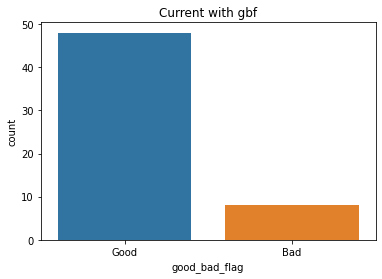

In [ ]:
bct_current= train_bank[train_bank["bank_account_type"]== "Current"]["good_bad_flag"]
print(bct_current.value_counts(normalize= True)*100)
sns.countplot(bct_current)
plt.title("Current with gbf")

Good    78.014599
Bad     21.985401
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Savings with gbf')

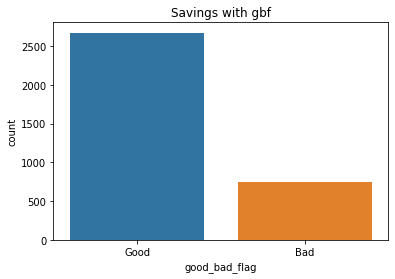

In [ ]:

bct_savings= train_bank[train_bank["bank_account_type"]== "Savings"]["good_bad_flag"]
print(bct_savings.value_counts(normalize= True)*100)
sns.countplot(bct_savings)
plt.title("Savings with gbf")

Good    78.281497
Bad     21.718503
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Permanent status with gbf')

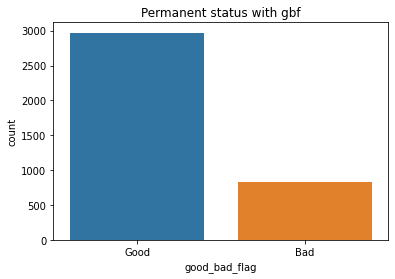

In [ ]:
esc_perm= train_bank[train_bank["employment_status_clients"]== "Permanent"]["good_bad_flag"]
print(esc_perm.value_counts(normalize= True)*100)
sns.countplot(esc_perm)
plt.title("Permanent status with gbf")

Good    80.28169
Bad     19.71831
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Student status with gbf')

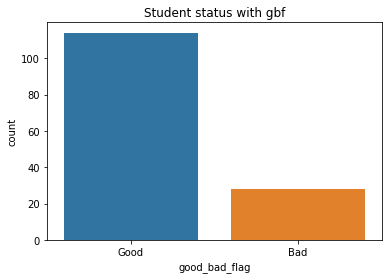

In [ ]:
esc_stud= train_bank[train_bank["employment_status_clients"]== "Student"]["good_bad_flag"]
print(esc_stud.value_counts(normalize= True)*100)
sns.countplot(esc_stud)
plt.title("Student status with gbf")

Good    73.684211
Bad     26.315789
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Unemployed status with gbf')

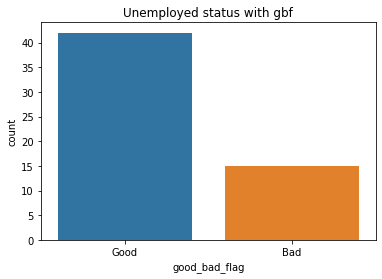

In [ ]:
esc_unemployed= train_bank[train_bank["employment_status_clients"]== "Unemployed"]["good_bad_flag"]
print(esc_unemployed.value_counts(normalize= True)*100)
sns.countplot(esc_unemployed)
plt.title("Unemployed status with gbf")

Good    78.16092
Bad     21.83908
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Self Employed with gbf')

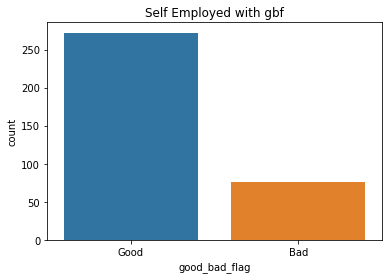

In [ ]:
esc_self= train_bank[train_bank["employment_status_clients"]== "Self-Employed"]["good_bad_flag"]
print(esc_self.value_counts(normalize= True)*100)
sns.countplot(esc_self)
plt.title("Self Employed with gbf")

Good    100.0
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Retired')

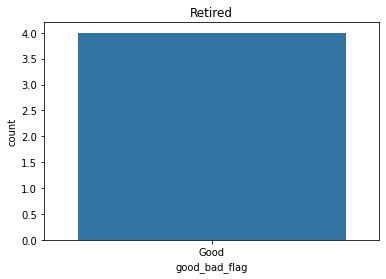

In [ ]:
esc_ret= train_bank[train_bank["employment_status_clients"]== "Retired"]["good_bad_flag"]
print(esc_ret.value_counts(normalize= True)*100)
sns.countplot(esc_ret)
plt.title("Retired")

Good    100.0
Name: good_bad_flag, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Contract staatus with gbf')

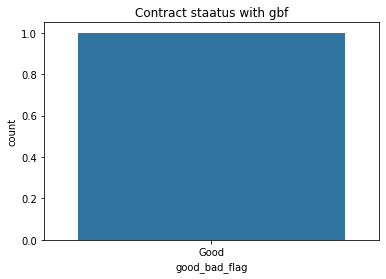

In [ ]:
esc_contract= train_bank[train_bank["employment_status_clients"]== "Contract"]["good_bad_flag"]
print(esc_contract.value_counts(normalize= True)*100)
sns.countplot(esc_contract)
plt.title("Contract staatus with gbf")

## Feature Engineering

In [ ]:
##for converting the categorical variables to numerical variables
Col= ("bank_account_type","good_bad_flag","level_of_education_clients","employment_status_clients")
for x in Col:
    le= LabelEncoder()
    train_bank[x]= le.fit_transform(train_bank[x].values)
train_bank.dtypes

customerid                     object
systemloanid                    int64
loannumber                      int64
loanamount                      int64
totaldue                      float64
termdays                        int64
good_bad_flag                   int64
longitude_gps                 float64
latitude_gps                  float64
bank_account_type               int64
employment_status_clients       int64
level_of_education_clients      int64
birth                         float64
approved                      float64
creation                      float64
duedate                       float64
repaiddate                    float64
closed                        float64
dtype: object

In [ ]:
cols= ("bank_account_type","level_of_education_clients","employment_status_clients")
for y in cols:
    le= LabelEncoder()
    test_bank[y]= le.fit_transform(test_bank[y].values)
test_bank.dtypes

customerid                     object
systemloanid                    int64
loannumber                      int64
loanamount                      int64
totaldue                      float64
termdays                        int64
longitude_gps                 float64
latitude_gps                  float64
bank_account_type               int64
employment_status_clients       int64
level_of_education_clients      int64
birth                         float64
approved                      float64
creation                      float64
duedate                       float64
repaiddate                    float64
closed                        float64
dtype: object

In [ ]:
#groupby on the customer id column and then resetting it as the index column
train= train_bank.groupby(["customerid"]).mean().reset_index()
test= test_bank.groupby(["customerid"]).mean().reset_index()
test.head(3)

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birth,approved,creation,duedate,repaiddate,closed
0,8a28afc7474813a40147639ec637156b,301997111,11,25000,27500.0,30,3.308835,6.666647,1,4,0,790819200.0,1.498727e+09,1.498724e+09,1.499990e+09,1.512633e+09,1.512634e+09
1,8a3735d5518aba7301518ac34413010d,301968180,7,20000,24500.0,30,3.944012,7.420548,1,3,0,495849600.0,1.495873e+09,1.495869e+09,1.512518e+09,1.486398e+09,1.486398e+09
2,8a76e7d443e6e97c0143ed099d102b1d,302000599,6,20000,24500.0,30,3.367945,6.576676,1,1,0,384912000.0,1.483716e+09,1.483712e+09,1.488845e+09,1.498325e+09,1.498326e+09


In [ ]:
first_date= train_bank["creation"]
second_date= train_bank["approved"]
train_bank["time_diff"]= first_date - second_date
train_bank["time_diff"].head()

0   -3600.0
1   -3600.0
2   -3600.0
3   -3600.0
4   -3600.0
Name: time_diff, dtype: float64

In [ ]:
first_date1= test_bank["creation"]
second_date1= test_bank["approved"]
test_bank["time_diff"]= first_date1 - second_date1
test_bank["time_diff"].head()

0   -3600.0
1   -3660.0
2   -3600.0
3   -3600.0
4   -3600.0
Name: time_diff, dtype: float64

## Modelling and Prediction Making

In [ ]:
train_new= train.drop("customerid",axis= 1)
X= train_new.drop("good_bad_flag", axis= 1)
Y= train_new.good_bad_flag
train_x, val_x, train_y, val_y= train_test_split(X,Y,test_size= 0.2, random_state= 42)


In [ ]:
Knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
Knn.fit(train_x,train_y)  
knn= Knn.predict(val_x)
print("KNN's accuracy score:",accuracy_score(val_y, knn))

KNN's accuracy score: 0.7873563218390804


In [ ]:
SVC = SVC(kernel='rbf', random_state = 1)
SVC.fit(train_x,train_y)
SVC= SVC.predict(val_x)
print("SVC's accuracy score:",accuracy_score(val_y, SVC))

SVC's accuracy score: 0.8022988505747126


[[ 26 146]
 [ 39 659]]


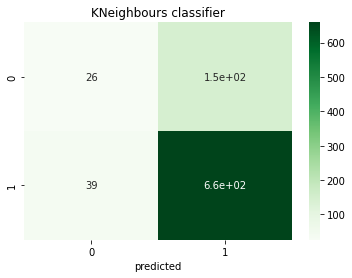

<Figure size 720x432 with 0 Axes>

In [ ]:
 ax= plt.subplot()
cm= confusion_matrix(val_y,knn)
print(cm)
sns.heatmap(cm,cmap="Greens", annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); 
ax.set_title("KNeighbours classifier");

[[  0 172]
 [  0 698]]


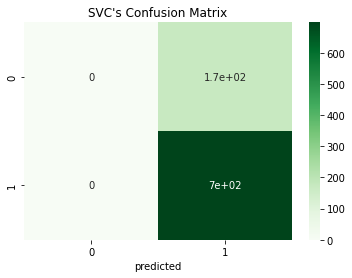

<Figure size 720x432 with 0 Axes>

In [ ]:
ax= plt.subplot()
cm= confusion_matrix(val_y,SVC)
print(cm)
sns.heatmap(cm,cmap="Greens", annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); 
ax.set_title("SVC's Confusion Matrix");